# Music Genre Classification using multiple classifiers
Team Members: Lisa Korntheuer, Jan Birkert, Adrian Desiderato, Jan Wangerin, Spyridon Spyropoulos

## Imports

In [41]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

from sklearn.neural_network import MLPClassifier
from scipy.stats import uniform, randint
import datetime as dt

# 0. Data understanding
Data describe (Features, Target etc.)
- filename and length irrelevant for ML
- 57 features -> PCA?
- only numerical data except for class labels ("label")

In [2]:
df = pd.read_csv('./data/features_30_sec.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   length                   1000 non-null   int64  
 2   chroma_stft_mean         1000 non-null   float64
 3   chroma_stft_var          1000 non-null   float64
 4   rms_mean                 1000 non-null   float64
 5   rms_var                  1000 non-null   float64
 6   spectral_centroid_mean   1000 non-null   float64
 7   spectral_centroid_var    1000 non-null   float64
 8   spectral_bandwidth_mean  1000 non-null   float64
 9   spectral_bandwidth_var   1000 non-null   float64
 10  rolloff_mean             1000 non-null   float64
 11  rolloff_var              1000 non-null   float64
 12  zero_crossing_rate_mean  1000 non-null   float64
 13  zero_crossing_rate_var   1000 non-null   float64
 14  harmony_mean             

In [3]:
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


Correlations between features:

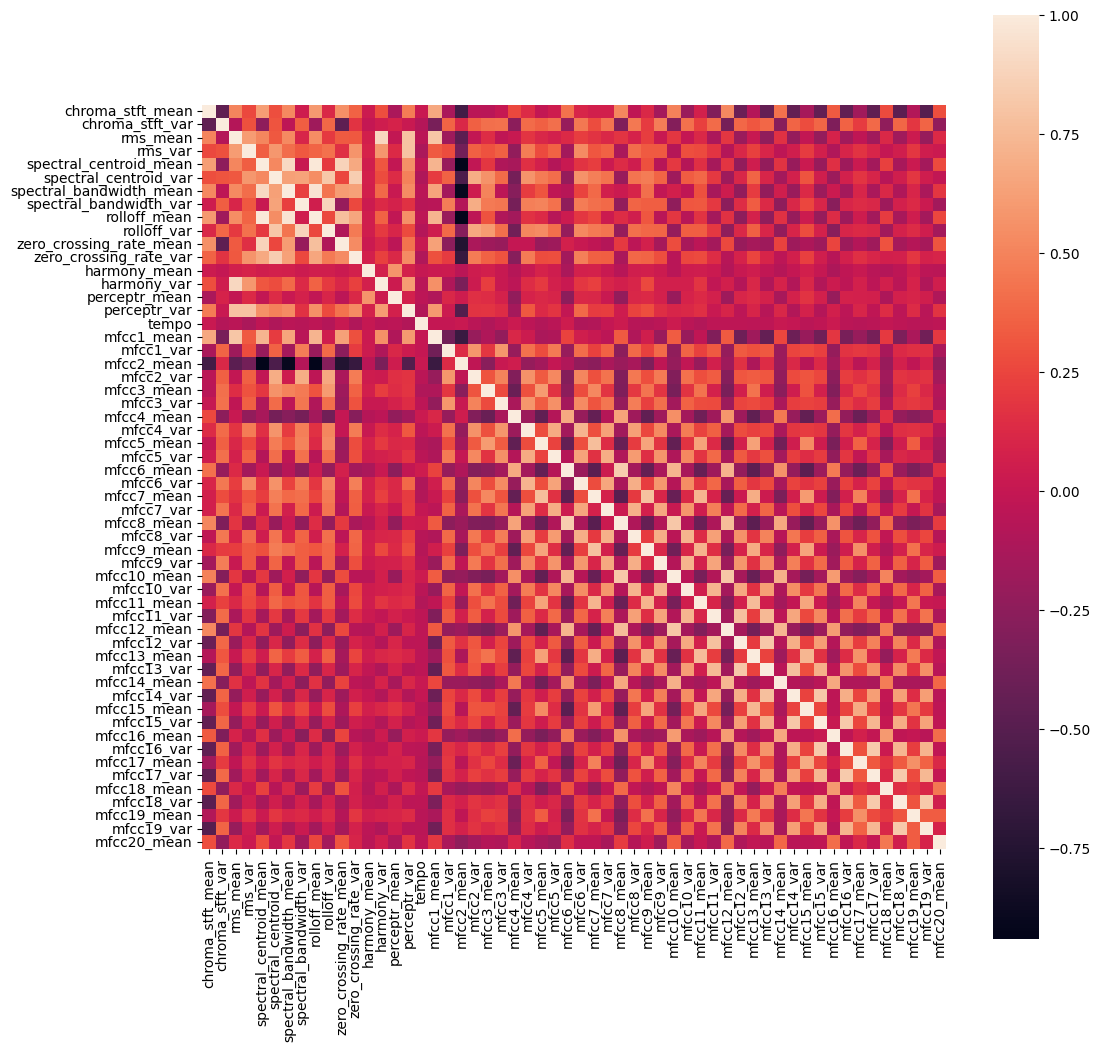

In [4]:
cor = df.iloc[:, 2:-2].corr()
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(cor, square = True, xticklabels=True, yticklabels=True) 
plt.show()

Since there are quite a few feature combinations with high correlations, PCA may be worth a try. (See Data Prep)

## 1. Data preparation
Jan W.

Data splitting

y = LabelEncoder() 

MinMax()
Das andere() 


In [45]:
LabelEnc = LabelEncoder()
y = df['label']
y = pd.DataFrame(LabelEnc.fit_transform(y))
df['label_enc'] = y

In [6]:
scaler_mms = MinMaxScaler()
scaler_ss = StandardScaler()
X = df.loc[:, 'chroma_stft_mean' : 'mfcc20_var']
X_scaled_array_mms = scaler_mms.fit_transform(X)
X_scaled_array_ss = scaler_ss.fit_transform(X)
X_scaled_mms = pd.DataFrame(X_scaled_array_mms, columns=X.columns)
X_scaled_ss = pd.DataFrame(X_scaled_array_ss, columns=X.columns)
print(X)
print(X_scaled_mms)
print(X_scaled_ss)

     chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0            0.350088         0.088757  0.130228  0.002827   
1            0.340914         0.094980  0.095948  0.002373   
2            0.363637         0.085275  0.175570  0.002746   
3            0.404785         0.093999  0.141093  0.006346   
4            0.308526         0.087841  0.091529  0.002303   
..                ...              ...       ...       ...   
995          0.352063         0.080487  0.079486  0.000345   
996          0.398687         0.075086  0.076458  0.000588   
997          0.432142         0.075268  0.081651  0.000322   
998          0.362485         0.091506  0.083860  0.001211   
999          0.358401         0.085884  0.054454  0.000336   

     spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0               1784.165850          129774.064525              2002.449060   
1               1530.176679          375850.073649              2039.036516   
2               15

PCA: (copied from Material Notebook 04, probably has to be adjusted later on)

In [47]:
pca = PCA() # typically you add here as a parameter the nbr. of cmponents: i.e.: n_components=2
            # we leave it blank to get all!
pcs = pca.fit_transform(X_scaled_ss) # principle components

Eigenvalues:

In [8]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[1.36649163e+01 9.65933079e+00 6.13364937e+00 4.33745591e+00
 2.61211618e+00 1.95989991e+00 1.70854392e+00 1.48113059e+00
 1.37118739e+00 1.07178668e+00 1.01254095e+00 9.24210833e-01
 7.50459385e-01 7.30963394e-01 6.44143574e-01 5.53745978e-01
 5.00178062e-01 4.64827693e-01 4.22397102e-01 4.07898891e-01
 3.85542239e-01 3.78955337e-01 3.62153149e-01 3.35032633e-01
 3.20003021e-01 3.01141898e-01 2.95709370e-01 2.85864666e-01
 2.75069740e-01 2.62752066e-01 2.48764454e-01 2.36549303e-01
 2.26002431e-01 2.16665436e-01 2.12592600e-01 1.98351665e-01
 1.95437861e-01 1.80251572e-01 1.74450532e-01 1.68263501e-01
 1.57569674e-01 1.46933998e-01 1.33990883e-01 1.25358591e-01
 1.20439773e-01 1.16404630e-01 1.07480664e-01 9.99399712e-02
 8.87346221e-02 8.60404693e-02 7.52295016e-02 5.27684212e-02
 3.64051449e-02 2.31935376e-02 8.00344303e-03 5.44102739e-03
 2.18634001e-03]
[2.39495638e-01 1.69292482e-01 1.07500276e-01 7.60196220e-02
 4.57807730e-02 3.43498248e-02 2.99444803e-02 2.59587625e-02
 2.4031

Principal Components (Dot Product of Data and Eigenvectors):

In [9]:
print(pcs[:5])
print()
print(len(pcs))

[[-2.78356454e+00 -1.02936476e+00 -5.22219128e-01 -1.15967714e-01
   7.13896125e-01  9.91845317e-01  3.53364789e-01  4.00634623e-01
   1.72260523e-01 -3.49387128e-01 -1.02344445e-01  3.72763321e-01
   6.60584136e-01 -1.09129048e-01  5.63449294e-01 -3.82415378e-01
  -3.88258453e-01  6.17636011e-01 -3.18070254e-01 -6.68235904e-02
   5.16876750e-01  8.48467253e-02  4.93548579e-01  4.08720491e-01
  -3.18512360e-01 -1.78949361e-01 -2.99620977e-01  2.15001340e-01
   4.62915730e-01  1.19703865e-01 -9.28363069e-02  1.47350306e-01
  -1.19259697e-01  4.69338355e-01 -4.40068791e-01  1.63277611e-01
  -7.52907361e-02 -1.88597493e-01  1.45613582e-01 -4.48205032e-01
  -2.12494059e-01 -2.34070807e-01  8.50717536e-02 -1.53881848e-01
  -1.32787046e-01 -4.69960101e-02 -9.81616691e-02  2.91886573e-01
   2.71947563e-01 -6.86067684e-03  2.34984829e-01  5.70604365e-02
  -4.16443053e-02  7.18943674e-03 -4.28527618e-02  2.13067568e-02
   5.14542045e-03]
 [ 1.72752117e+00 -1.16572684e+00  1.34813922e+00 -2.4608

Scree Plot with Kaiser Criteria

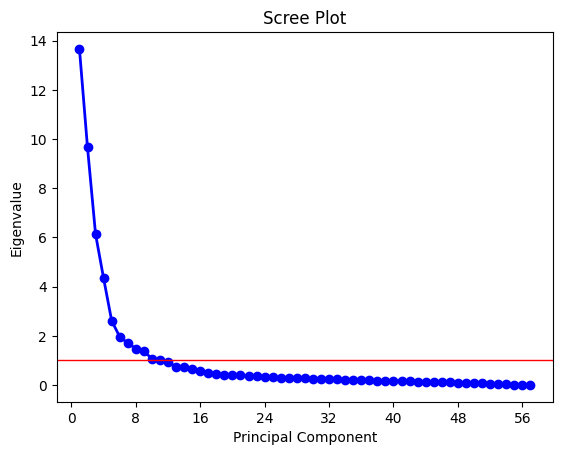

In [10]:
import matplotlib.ticker as ticker
fig = plt.figure()
ax = plt.axes()

pc_values = np.arange(pca.n_components_) + 1
ax.plot(pc_values, pca.explained_variance_, 'o-', linewidth=2, color='blue')
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, linewidth=1, color='r')
plt.show()

Potentially, a lot of dimensions could be removed according to the Kaiser criteria. The following enumeration shows how much "information" is contained in how many of the principal components:

In [11]:
for i in [10, 15, 30, 45]:
    print(np.sum(pca.explained_variance_ratio_[:i]))

0.771158193247534
0.8423556637148909
0.9396490070759943
0.9876995448225625


To fight the curse of dimensionality, some dimensions could be removed, for example the last 12 to even 27 dimensions, since about 94% of "information" is contained in the first 30 PCs.

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
X_train_mms, X_test_mms, y_train_mms, y_test_mms = train_test_split(X_scaled_mms, y, test_size=0.2, random_state=0, stratify=y)
X_train_ss, X_test_ss, y_train_ss, y_test_ss = train_test_split(X_scaled_ss, y, test_size=0.2, random_state=0, stratify=y)

## 2. Model training 

Each Modell is trained and the quality of the classifier(accuracy) is displayed. 

### 2.1 Random Forests
Spyridon 

In this section Random Forest as a classifier will be tested. In the first step all important libraries will be imported.

In [173]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.tree as tree

#### 2.1.1 Simple Hyperparameter tuning 
When training random forests, there is no heavy hyperparameter needed to get a good accuracy. The structure of the model is already decreasing Bias and Variance by injecting randomness on constructing the trees. By Random Feature selection and bagging the Risk of Overfitting is minimized, and by tuning the hyperparameters, the Underfitting risk is also minimized. So it is enough only to tune the numbers of trees in the ensemlbe "n_estimators" and the spliting criterion. All other hyperparameters will use the default values. 

In [13]:

rf = RandomForestClassifier(random_state=0, n_jobs=-1)
param_grid = {'n_estimators': np.array([ 100, 250, 500, 1000, 2000, 7000]), 
              'criterion':['gini','entropy', 'log_loss'],
              }
grid_search_rf_simple = GridSearchCV(rf, param_grid, n_jobs=-1, cv=2, scoring='accuracy', verbose=1, refit=True)
grid_search_rf_simple.fit(X_train, y_train.values.ravel())
y_pred_rf_simple = grid_search_rf_simple.predict(X_test)


Accuracy: 0.745
Accuracy: 0.745
Accuracy: 0.745


The GridSearch found out the best model, the results: 

In [ ]:
grid_search_rf_simple.score(X_test, y_test)
print("Best Score: %f" % grid_search_rf_simple.best_score_)
print("Optimal Hyperparameter Values: ", grid_search_rf_simple.best_params_)
print("Optimal Model: ", grid_search_rf_simple.best_estimator_)
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_simple)}")

So in ~20 seconds (on my machine), Gridsearch found a model with 76% accuracy. That's a really good result! 

#### 2.1.2 Heavy Hyperparameter tuning

But lets also try some heavy hyperparameter tuning to see what results can be achieved: (This takes some time....)

In [ ]:

rf_heavy = RandomForestClassifier(random_state=0, n_jobs=-1)
param_grid_rf_heavy = {'n_estimators': np.array([ 100, 250, 500, 1000, 2000, 7000]), 
              'criterion':['gini','entropy', 'log_loss'],
              'max_depth': np.array([3,5, 7,10, None]),
                'min_samples_split': np.array([2, 5, 10]),
                'min_samples_leaf': np.array([1, 2, 4]),
                'max_features': np.array(['sqrt', 'log2'])
              }
grid_search_rf_heavy = GridSearchCV(rf_heavy, param_grid_rf_heavy, n_jobs=-1, cv=2, scoring='accuracy', verbose=1, refit=True)
grid_search_rf_heavy.fit(X_train, y_train.values.ravel())
y_pred_heavy = grid_search_rf_heavy.predict(X_test)


In [ ]:
grid_search_rf_heavy.score(X_test, y_test)
print("Best Score: %f" % grid_search_rf_heavy.best_score_)
print("Optimal Hyperparameter Values: ", grid_search_rf_heavy.best_params_)
print("Optimal Model: ", grid_search_rf_heavy.best_estimator_)
print(f"Accuracy: {accuracy_score(y_test, y_pred_heavy)}")

#### 2.1.3 Best Random Forest

We see that with heavy hyperparameter tuning, that needed more than 15 minutes, the resulting forest is not really giving much more performance. There might be a better slightly better score of the found model, but the resulting accuracy of the model is worse. So our best Random Forest model is the following:

In [ ]:
rf_simple_best = grid_search_rf_simple.best_estimator_
rf_simple_best 

Let's analyze the resulting model.

We start by looking into the feature importance of the model: 

In [ ]:
rf_simple_best = grid_search_rf_simple.best_estimator_

importances = rf_simple_best.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns


top_n = 15
top_indices = indices[:top_n]
top_importances = importances[top_indices]

top_feature_names = [feature_names[idx] for idx in top_indices]
print("Feature ranking with names:")


plt.figure()
plt.title(f"Top {top_n} Feature Importances")
plt.bar(range(top_n), top_importances, align="center")
plt.xticks(range(top_n), top_feature_names, rotation=45, ha='right')
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.xlim([-1, top_n])
plt.show()


### 2.2 Decision trees

Jan W.

First try using post-pruning and the entire dataset. Post-pruning is done using hyperparameter-tuning with GridsearchCV.

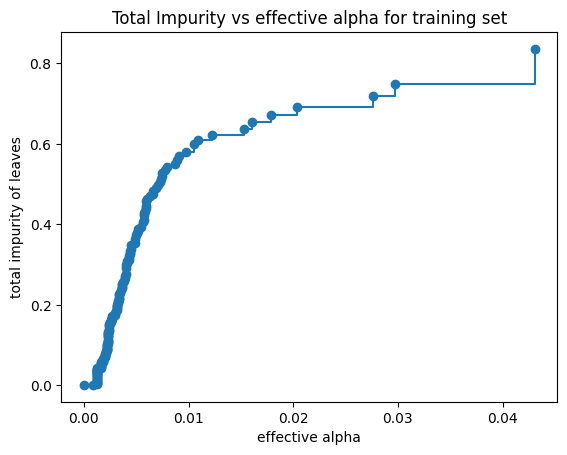

In [14]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import tree

clf = DecisionTreeClassifier(random_state=0) #maybe use variable for random state so that all classifiers can be adjusted at the same time
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

plt.show()

In [15]:
parameters = {'ccp_alpha':ccp_alphas[:-1].tolist()}
gs = GridSearchCV(DecisionTreeClassifier(random_state=0), parameters, cv=10, refit=True)
gs.fit(X_train,y_train)
tree_best = gs.best_estimator_
pred = tree_best.predict(X_test)
print('Accuracy', accuracy_score(y_test, pred))

Accuracy 0.49


In [16]:
rules = export_text(tree_best, feature_names=X.columns)
print(rules)
print()
print("Feature importance:\n")
feature_importance = {}
i = 0
for col in X.columns:
    feature_importance[col] = tree_best.feature_importances_[i]
    i += 1
features_sorted = sorted(feature_importance.items(), key=lambda x : x[1])
features_sorted.reverse()
for feature in features_sorted:
    print(feature)

|--- perceptr_var <= 0.00
|   |--- rolloff_var <= 1649228.00
|   |   |--- mfcc9_mean <= -17.37
|   |   |   |--- class: 5
|   |   |--- mfcc9_mean >  -17.37
|   |   |   |--- perceptr_mean <= 0.00
|   |   |   |   |--- class: 1
|   |   |   |--- perceptr_mean >  0.00
|   |   |   |   |--- chroma_stft_mean <= 0.25
|   |   |   |   |   |--- class: 5
|   |   |   |   |--- chroma_stft_mean >  0.25
|   |   |   |   |   |--- class: 1
|   |--- rolloff_var >  1649228.00
|   |   |--- mfcc4_var <= 198.69
|   |   |   |--- class: 5
|   |   |--- mfcc4_var >  198.69
|   |   |   |--- class: 1
|--- perceptr_var >  0.00
|   |--- spectral_centroid_var <= 481185.62
|   |   |--- chroma_stft_mean <= 0.43
|   |   |   |--- perceptr_var <= 0.00
|   |   |   |   |--- mfcc2_var <= 563.07
|   |   |   |   |   |--- mfcc3_mean <= -30.94
|   |   |   |   |   |   |--- rolloff_mean <= 2809.95
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- rolloff_mean >  2809.95
|   |   |   |   |   |   |   |--- class: 9
|

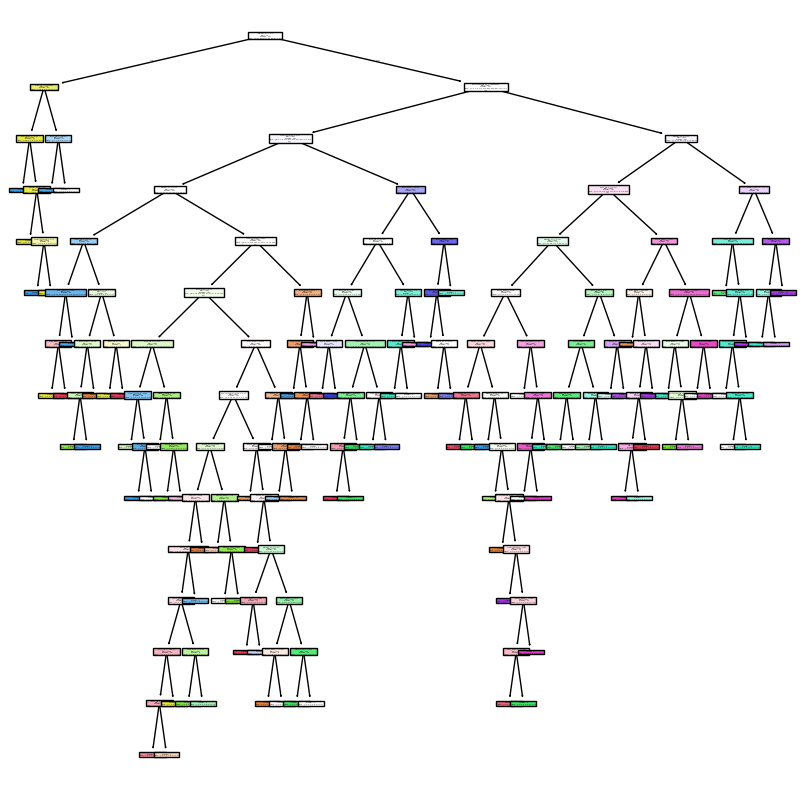

In [17]:
fig = plt.figure(figsize=(10,10))
text = tree.plot_tree(tree_best, 
                   feature_names=X.columns.to_list(), 
                   filled=True)

plt.show()

Maybe try pre pruning with lower maximum height of tree, although that probably won't lead to better results. 

In [18]:
cls = DecisionTreeClassifier(random_state=0)

params = {'max_depth':np.arange(3,15),
#          'min_samples_leaf':[3,5,10,15,20],
#          'min_samples_split':[8,10,12,18,20,16],
          'criterion':['gini','entropy']}
gs = GridSearchCV(cls, params, scoring='accuracy', cv=10, verbose=3, n_jobs=-1)
gs.fit(X_train, y_train)
params_optimal = gs.best_params_

print("Best Score: %f" % gs.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV 6/10] END ......criterion=gini, max_depth=3;, score=0.312 total time=   0.0s
[CV 8/10] END ......criterion=gini, max_depth=3;, score=0.250 total time=   0.0s
[CV 1/10] END ......criterion=gini, max_depth=3;, score=0.300 total time=   0.0s
[CV 4/10] END ......criterion=gini, max_depth=3;, score=0.350 total time=   0.0s
[CV 2/10] END ......criterion=gini, max_depth=3;, score=0.375 total time=   0.0s
[CV 5/10] END ......criterion=gini, max_depth=3;, score=0.350 total time=   0.0s
[CV 3/10] END ......criterion=gini, max_depth=3;, score=0.388 total time=   0.0s
[CV 9/10] END ......criterion=gini, max_depth=3;, score=0.325 total time=   0.0s
[CV 10/10] END .....criterion=gini, max_depth=3;, score=0.350 total time=   0.0s
[CV 1/10] END ......criterion=gini, max_depth=4;, score=0.400 total time=   0.0s
[CV 3/10] END ......criterion=gini, max_depth=4;, score=0.450 total time=   0.0s
[CV 2/10] END ......criterion=gini, max_depth=

In [19]:
tree_best = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=11) #, min_samples_leaf=20, min_samples_split=8)
tree_best.fit(X_train, y_train)
pred = tree_best.predict(X_test)

print('Test accuracy',accuracy_score(y_test, pred))

Test accuracy 0.52


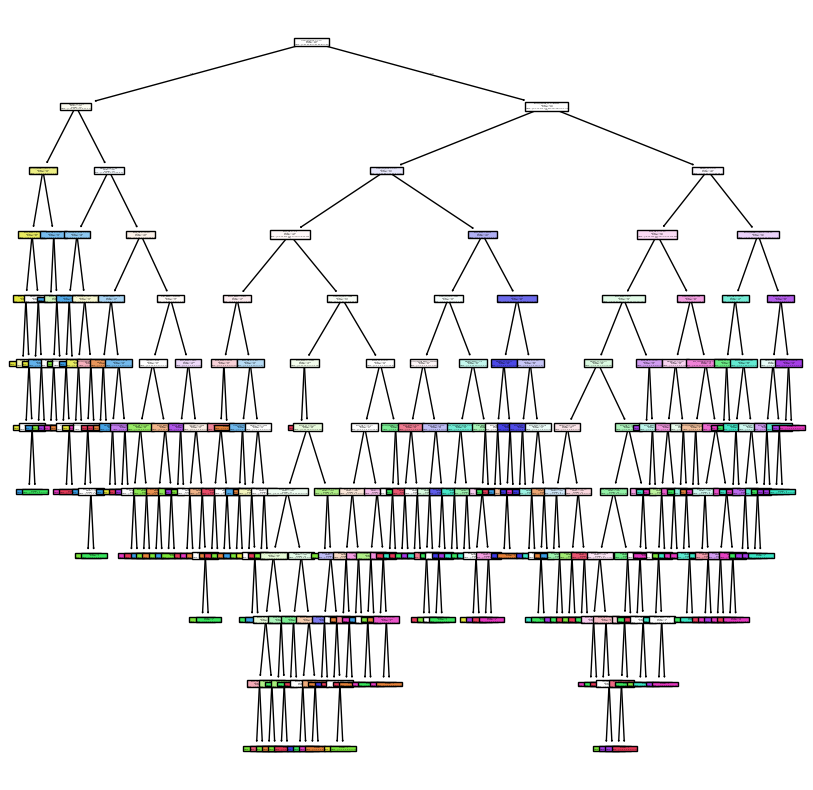

In [20]:
fig = plt.figure(figsize=(10,10))
text = tree.plot_tree(tree_best, 
                   feature_names=X.columns.to_list(), 
                   filled=True)

plt.show()

Also try reduction of dimensions with PCA (only first 30 or so dimensions?)

### 2.3 KNN

Now the music genres are classified with the **k-Nearest Neighbors** algorithm. To enhance model performance, it can be useful to tune the following three hyperparameters via cross validation:
* ***n_neighbors***  :  number of neighbors $k$
* ***weights***  :  weights assigned to the nearest neighbors, especially relevant in case of ties
  - 'uniform'  :  all neighbors have equal weights
  - 'distance'  :  neighbors closer to the target point have higher weights
* ***metric***  :  method for distance computation
  - 'euclidean'  :  Euclidean distance
  - 'manhatten'  :  Manhatten distance

The first step is to define the possible values for each of these parameters in a dictionary.

In [62]:
# Define parameter combinations for hyperparameter tuning via cross validation 
params = {'n_neighbors': np.arange(1,20),               # parameter 'k' 
              'weights': ['uniform', 'distance'],       # parameter 'weights'
              'metric' : ['euclidean','manhattan']}     # parameter 'metric'

Then hyperparameter tuning is performed with the help of *GridSearchCV*, using 10-fold cross validation and accuracy as evaluation measure. The model is trained on the training data which have been normalized with the *MinMaxScaler*.

In [22]:

# Create KNN classifier
knn = KNeighborsClassifier()
# Use GridSearchCV to tune the chosen parameters
gs = GridSearchCV(knn, params, scoring='accuracy', cv=10, verbose=3, n_jobs=-1, refit=True)
# Train
gs.fit(X_train_mms, y_train_mms.values.ravel())    # Use training data scaled with MinMaxScaler

Fitting 10 folds for each of 156 candidates, totalling 1560 fits
[CV 3/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.675 total time=   0.0s
[CV 4/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.700 total time=   0.0s
[CV 5/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.725 total time=   0.0s
[CV 1/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.700 total time=   0.0s
[CV 2/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.662 total time=   0.0s
[CV 6/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.675 total time=   0.0s
[CV 7/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.650 total time=   0.0s
[CV 1/10] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.700 total time=   0.0s
[CV 2/10] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.662 total time=   0.0s
[CV 9/10] END metric=euclidean, n_neighbors=1, weights=uniform;, scor

/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

[CV 5/10] END metric=euclidean, n_neighbors=6, weights=uniform;, score=0.675 total time=   0.0s
[CV 9/10] END metric=euclidean, n_neighbors=6, weights=uniform;, score=0.650 total time=   0.0s
[CV 10/10] END metric=euclidean, n_neighbors=5, weights=uniform;, score=0.600 total time=   0.0s
[CV 3/10] END metric=euclidean, n_neighbors=5, weights=uniform;, score=0.637 total time=   0.0s
[CV 9/10] END metric=euclidean, n_neighbors=5, weights=distance;, score=0.688 total time=   0.0s
[CV 5/10] END metric=euclidean, n_neighbors=5, weights=distance;, score=0.738 total time=   0.0s
[CV 7/10] END metric=euclidean, n_neighbors=5, weights=uniform;, score=0.625 total time=   0.0s
[CV 10/10] END metric=euclidean, n_neighbors=5, weights=distance;, score=0.625 total time=   0.0s
[CV 10/10] END metric=euclidean, n_neighbors=6, weights=uniform;, score=0.575 total time=   0.0s
[CV 6/10] END metric=euclidean, n_neighbors=6, weights=uniform;, score=0.738 total time=   0.0s
[CV 4/10] END metric=euclidean, n_

/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam


[CV 8/10] END metric=euclidean, n_neighbors=7, weights=uniform;, score=0.662 total time=   0.0s
[CV 10/10] END metric=euclidean, n_neighbors=8, weights=distance;, score=0.562 total time=   0.0s
[CV 4/10] END metric=euclidean, n_neighbors=9, weights=distance;, score=0.662 total time=   0.0s
[CV 5/10] END metric=euclidean, n_neighbors=9, weights=uniform;, score=0.675 total time=   0.0s
[CV 8/10] END metric=euclidean, n_neighbors=9, weights=distance;, score=0.625 total time=   0.0s
[CV 10/10] END metric=euclidean, n_neighbors=8, weights=uniform;, score=0.537 total time=   0.0s
[CV 4/10] END metric=euclidean, n_neighbors=8, weights=uniform;, score=0.675 total time=   0.0s
[CV 3/10] END metric=euclidean, n_neighbors=10, weights=distance;, score=0.662 total time=   0.0s
[CV 6/10] END metric=euclidean, n_neighbors=10, weights=uniform;, score=0.700 total time=   0.0s
[CV 5/10] END metric=euclidean, n_neighbors=9, weights=distance;, score=0.700 total time=   0.0s
[CV 9/10] END metric=euclidean

/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

[CV 4/10] END metric=euclidean, n_neighbors=18, weights=distance;, score=0.613 total time=   0.0s
[CV 7/10] END metric=euclidean, n_neighbors=16, weights=uniform;, score=0.575 total time=   0.0s
[CV 2/10] END metric=euclidean, n_neighbors=17, weights=uniform;, score=0.575 total time=   0.0s
[CV 9/10] END metric=euclidean, n_neighbors=17, weights=distance;, score=0.625 total time=   0.0s
[CV 9/10] END metric=euclidean, n_neighbors=14, weights=distance;, score=0.675 total time=   0.0s
[CV 5/10] END metric=euclidean, n_neighbors=18, weights=distance;, score=0.600 total time=   0.0s
[CV 3/10] END metric=euclidean, n_neighbors=14, weights=uniform;, score=0.650 total time=   0.0s
[CV 6/10] END metric=euclidean, n_neighbors=13, weights=uniform;, score=0.738 total time=   0.0s
[CV 3/10] END metric=euclidean, n_neighbors=15, weights=distance;, score=0.662 total time=   0.0s
[CV 10/10] END metric=euclidean, n_neighbors=17, weights=distance;, score=0.575 total time=   0.0s
[CV 10/10] END metric=e

/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

[CV 4/10] END metric=euclidean, n_neighbors=17, weights=distance;, score=0.613 total time=   0.0s
[CV 5/10] END metric=euclidean, n_neighbors=20, weights=uniform;, score=0.588 total time=   0.0s
[CV 10/10] END metric=euclidean, n_neighbors=18, weights=uniform;, score=0.600 total time=   0.0s
[CV 4/10] END metric=euclidean, n_neighbors=16, weights=uniform;, score=0.575 total time=   0.0s
[CV 5/10] END metric=euclidean, n_neighbors=17, weights=distance;, score=0.650 total time=   0.0s
[CV 1/10] END metric=euclidean, n_neighbors=14, weights=distance;, score=0.700 total time=   0.0s
[CV 1/10] END metric=euclidean, n_neighbors=21, weights=uniform;, score=0.637 total time=   0.0s
[CV 7/10] END metric=euclidean, n_neighbors=19, weights=uniform;, score=0.550 total time=   0.0s
[CV 10/10] END metric=euclidean, n_neighbors=19, weights=uniform;, score=0.562 total time=   0.0s
[CV 1/10] END metric=euclidean, n_neighbors=18, weights=distance;, score=0.700 total time=   0.0s
[CV 7/10] END metric=euc

ple using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

[CV 2/10] END metric=euclidean, n_neighbors=24, weights=uniform;, score=0.588 total time=   0.0s[CV 4/10] END metric=euclidean, n_neighbors=21, weights=distance;, score=0.650 total time=   0.0s

[CV 9/10] END metric=euclidean, n_neighbors=20, weights=distance;, score=0.625 total time=   0.0s
[CV 6/10] END metric=euclidean, n_neighbors=24, weights=distance;, score=0.713 total time=   0.0s
[CV 4/10] END metric=euclidean, n_neighbors=20, weights=uniform;, score=0.588 total time=   0.0s
[CV 10/10] END metric=euclidean, n_neighbors=25, weights=uniform;, score=0.525 total time=   0.0s
[CV 10/10] END metric=euclidean, n_neighbors=22, weights=uniform;, score=0.537 total time=   0.0s
[CV 6/10] END metric=euclidean, n_neighbors=23, weights=uniform;, score=0.700 total time=   0.0s
[CV 5/10] END metric=euclidean, n_neighbors=21, weights=distance;, score=0.662 total time=   0.0s
[CV 10/10] END metric=euclidean, n_neighbors=20, weights=distance;, score=0.588 total time=   0.0s
[CV 7/10] END metric=e

/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

[CV 10/10] END metric=euclidean, n_neighbors=32, weights=uniform;, score=0.500 total time=   0.0s
[CV 10/10] END metric=euclidean, n_neighbors=35, weights=uniform;, score=0.475 total time=   0.0s
[CV 7/10] END metric=euclidean, n_neighbors=37, weights=distance;, score=0.562 total time=   0.0s
[CV 6/10] END metric=euclidean, n_neighbors=33, weights=uniform;, score=0.650 total time=   0.0s
[CV 2/10] END metric=euclidean, n_neighbors=37, weights=uniform;, score=0.562 total time=   0.0s
[CV 6/10] END metric=euclidean, n_neighbors=36, weights=uniform;, score=0.637 total time=   0.0s
[CV 1/10] END metric=euclidean, n_neighbors=32, weights=distance;, score=0.637 total time=   0.0s
[CV 6/10] END metric=euclidean, n_neighbors=34, weights=distance;, score=0.650 total time=   0.0s
[CV 1/10] END metric=euclidean, n_neighbors=35, weights=distance;, score=0.637 total time=   0.0s
[CV 8/10] END metric=euclidean, n_neighbors=37, weights=distance;, score=0.575 total time=   0.0s
[CV 7/10] END metric=eu

/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

[CV 4/10] END metric=manhattan, n_neighbors=4, weights=distance;, score=0.688 total time=   0.0s
[CV 9/10] END metric=manhattan, n_neighbors=5, weights=uniform;, score=0.650 total time=   0.0s
[CV 1/10] END metric=manhattan, n_neighbors=4, weights=uniform;, score=0.700 total time=   0.0s
[CV 8/10] END metric=manhattan, n_neighbors=2, weights=uniform;, score=0.713 total time=   0.0s
[CV 4/10] END metric=manhattan, n_neighbors=1, weights=uniform;, score=0.725 total time=   0.0s
[CV 5/10] END metric=manhattan, n_neighbors=4, weights=distance;, score=0.762 total time=   0.0s
[CV 4/10] END metric=manhattan, n_neighbors=1, weights=distance;, score=0.725 total time=   0.0s
[CV 5/10] END metric=manhattan, n_neighbors=3, weights=uniform;, score=0.713 total time=   0.0s
[CV 10/10] END metric=manhattan, n_neighbors=5, weights=uniform;, score=0.625 total time=   0.0s
[CV 1/10] END metric=manhattan, n_neighbors=6, weights=uniform;, score=0.688 total time=   0.0s
[CV 2/10] END metric=manhattan, n_ne

ple using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

[CV 6/10] END metric=manhattan, n_neighbors=7, weights=uniform;, score=0.750 total time=   0.0s
[CV 2/10] END metric=manhattan, n_neighbors=10, weights=uniform;, score=0.700 total time=   0.0s
[CV 10/10] END metric=manhattan, n_neighbors=6, weights=uniform;, score=0.588 total time=   0.0s
[CV 3/10] END metric=manhattan, n_neighbors=8, weights=distance;, score=0.700 total time=   0.0s
[CV 3/10] END metric=manhattan, n_neighbors=11, weights=distance;, score=0.650 total time=   0.0s
[CV 10/10] END metric=manhattan, n_neighbors=7, weights=distance;, score=0.625 total time=   0.0s
[CV 7/10] END metric=manhattan, n_neighbors=10, weights=distance;, score=0.637 total time=   0.0s
[CV 1/10] END metric=manhattan, n_neighbors=6, weights=distance;, score=0.713 total time=   0.0s
[CV 4/10] END metric=manhattan, n_neighbors=11, weights=distance;, score=0.725 total time=   0.0s
[CV 4/10] END metric=manhattan, n_neighbors=8, weights=distance;, score=0.675 total time=   0.0s
[CV 7/10] END metric=manhat

/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

[CV 8/10] END metric=manhattan, n_neighbors=14, weights=uniform;, score=0.613 total time=   0.0s
[CV 8/10] END metric=manhattan, n_neighbors=12, weights=distance;, score=0.650 total time=   0.0s
[CV 7/10] END metric=manhattan, n_neighbors=15, weights=distance;, score=0.650 total time=   0.0s
[CV 5/10] END metric=manhattan, n_neighbors=17, weights=uniform;, score=0.625 total time=   0.0s
[CV 5/10] END metric=manhattan, n_neighbors=15, weights=uniform;, score=0.625 total time=   0.0s
[CV 2/10] END metric=manhattan, n_neighbors=11, weights=distance;, score=0.688 total time=   0.0s
[CV 9/10] END metric=manhattan, n_neighbors=12, weights=distance;, score=0.675 total time=   0.0s
[CV 9/10] END metric=manhattan, n_neighbors=14, weights=uniform;, score=0.650 total time=   0.0s
[CV 8/10] END metric=manhattan, n_neighbors=15, weights=distance;, score=0.637 total time=   0.0s
[CV 10/10] END metric=manhattan, n_neighbors=16, weights=uniform;, score=0.588 total time=   0.0s
[CV 9/10] END metric=man

/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

[CV 7/10] END metric=manhattan, n_neighbors=16, weights=distance;, score=0.637 total time=   0.0s
[CV 5/10] END metric=manhattan, n_neighbors=19, weights=distance;, score=0.675 total time=   0.0s
[CV 7/10] END metric=manhattan, n_neighbors=16, weights=uniform;, score=0.625 total time=   0.0s
[CV 5/10] END metric=manhattan, n_neighbors=17, weights=distance;, score=0.650 total time=   0.0s
[CV 6/10] END metric=manhattan, n_neighbors=21, weights=uniform;, score=0.700 total time=   0.0s
[CV 6/10] END metric=manhattan, n_neighbors=18, weights=uniform;, score=0.700 total time=   0.0s
[CV 10/10] END metric=manhattan, n_neighbors=20, weights=uniform;, score=0.613 total time=   0.0s
[CV 2/10] END metric=manhattan, n_neighbors=19, weights=uniform;, score=0.625 total time=   0.1s
[CV 8/10] END metric=manhattan, n_neighbors=16, weights=distance;, score=0.650 total time=   0.0s
[CV 6/10] END metric=manhattan, n_neighbors=19, weights=distance;, score=0.738 total time=   0.0s
[CV 6/10] END metric=man

/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

[CV 10/10] END metric=manhattan, n_neighbors=20, weights=distance;, score=0.662 total time=   0.0s
[CV 5/10] END metric=manhattan, n_neighbors=21, weights=distance;, score=0.650 total time=   0.0s
[CV 1/10] END metric=manhattan, n_neighbors=20, weights=uniform;, score=0.662 total time=   0.1s
[CV 5/10] END metric=manhattan, n_neighbors=23, weights=distance;, score=0.688 total time=   0.0s
[CV 10/10] END metric=manhattan, n_neighbors=18, weights=uniform;, score=0.588 total time=   0.1s
[CV 1/10] END metric=manhattan, n_neighbors=23, weights=uniform;, score=0.662 total time=   0.0s
[CV 6/10] END metric=manhattan, n_neighbors=19, weights=uniform;, score=0.713 total time=   0.0s
[CV 6/10] END metric=manhattan, n_neighbors=21, weights=distance;, score=0.738 total time=   0.0s
[CV 6/10] END metric=manhattan, n_neighbors=23, weights=distance;, score=0.700 total time=   0.0s
[CV 1/10] END metric=manhattan, n_neighbors=21, weights=uniform;, score=0.662 total time=   0.0s
[CV 4/10] END metric=ma

/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

[CV 8/10] END metric=manhattan, n_neighbors=25, weights=uniform;, score=0.600 total time=   0.0s
[CV 2/10] END metric=manhattan, n_neighbors=24, weights=distance;, score=0.637 total time=   0.0s
[CV 4/10] END metric=manhattan, n_neighbors=24, weights=uniform;, score=0.537 total time=   0.0s
[CV 4/10] END metric=manhattan, n_neighbors=26, weights=uniform;, score=0.562 total time=   0.0s
[CV 10/10] END metric=manhattan, n_neighbors=26, weights=distance;, score=0.588 total time=   0.0s
[CV 3/10] END metric=manhattan, n_neighbors=22, weights=distance;, score=0.688 total time=   0.0s
[CV 9/10] END metric=manhattan, n_neighbors=25, weights=uniform;, score=0.625 total time=   0.0s
[CV 10/10] END metric=manhattan, n_neighbors=23, weights=uniform;, score=0.537 total time=   0.0s
[CV 5/10] END metric=manhattan, n_neighbors=24, weights=uniform;, score=0.625 total time=   0.0s
[CV 3/10] END metric=manhattan, n_neighbors=24, weights=distance;, score=0.700 total time=   0.0s
[CV 5/10] END metric=man

/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

[CV 2/10] END metric=manhattan, n_neighbors=28, weights=uniform;, score=0.588 total time=   0.0s
[CV 9/10] END metric=manhattan, n_neighbors=29, weights=uniform;, score=0.613 total time=   0.0s
[CV 1/10] END metric=manhattan, n_neighbors=25, weights=uniform;, score=0.662 total time=   0.0s
[CV 8/10] END metric=manhattan, n_neighbors=27, weights=uniform;, score=0.575 total time=   0.0s
[CV 4/10] END metric=manhattan, n_neighbors=30, weights=uniform;, score=0.550 total time=   0.0s
[CV 9/10] END metric=manhattan, n_neighbors=25, weights=distance;, score=0.675 total time=   0.0s
[CV 5/10] END metric=manhattan, n_neighbors=28, weights=distance;, score=0.662 total time=   0.0s
[CV 3/10] END metric=manhattan, n_neighbors=26, weights=distance;, score=0.700 total time=   0.0s
[CV 2/10] END metric=manhattan, n_neighbors=25, weights=uniform;, score=0.613 total time=   0.0s
[CV 10/10] END metric=manhattan, n_neighbors=25, weights=distance;, score=0.562 total time=   0.0s
[CV 6/10] END metric=manh

/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

[CV 9/10] END metric=manhattan, n_neighbors=29, weights=distance;, score=0.650 total time=   0.0s
[CV 4/10] END metric=manhattan, n_neighbors=32, weights=distance;, score=0.600 total time=   0.0s
[CV 8/10] END metric=manhattan, n_neighbors=33, weights=uniform;, score=0.600 total time=   0.0s
[CV 9/10] END metric=manhattan, n_neighbors=31, weights=distance;, score=0.650 total time=   0.0s
[CV 3/10] END metric=manhattan, n_neighbors=30, weights=distance;, score=0.675 total time=   0.0s
[CV 1/10] END metric=manhattan, n_neighbors=34, weights=uniform;, score=0.625 total time=   0.0s
[CV 7/10] END metric=manhattan, n_neighbors=34, weights=distance;, score=0.550 total time=   0.0s
[CV 5/10] END metric=manhattan, n_neighbors=32, weights=distance;, score=0.613 total time=   0.0s[CV 10/10] END metric=manhattan, n_neighbors=29, weights=distance;, score=0.575 total time=   0.0s

[CV 3/10] END metric=manhattan, n_neighbors=31, weights=uniform;, score=0.675 total time=   0.0s
[CV 10/10] END metric=

/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

[CV 8/10] END metric=manhattan, n_neighbors=34, weights=uniform;, score=0.588 total time=   0.0s
[CV 1/10] END metric=manhattan, n_neighbors=31, weights=distance;, score=0.662 total time=   0.0s
[CV 4/10] END metric=manhattan, n_neighbors=33, weights=uniform;, score=0.575 total time=   0.0s
[CV 5/10] END metric=manhattan, n_neighbors=36, weights=distance;, score=0.650 total time=   0.0s
[CV 6/10] END metric=manhattan, n_neighbors=35, weights=uniform;, score=0.688 total time=   0.0s
[CV 9/10] END metric=manhattan, n_neighbors=33, weights=distance;, score=0.650 total time=   0.0s
[CV 2/10] END metric=manhattan, n_neighbors=36, weights=uniform;, score=0.600 total time=   0.0s
[CV 8/10] END metric=manhattan, n_neighbors=32, weights=uniform;, score=0.588 total time=   0.0s
[CV 2/10] END metric=manhattan, n_neighbors=31, weights=distance;, score=0.637 total time=   0.0s
[CV 9/10] END metric=manhattan, n_neighbors=34, weights=uniform;, score=0.600 total time=   0.0s
[CV 5/10] END metric=manha

/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam


[CV 3/10] END metric=manhattan, n_neighbors=37, weights=distance;, score=0.650 total time=   0.0s
[CV 5/10] END metric=manhattan, n_neighbors=39, weights=uniform;, score=0.637 total time=   0.0s
[CV 4/10] END metric=manhattan, n_neighbors=37, weights=uniform;, score=0.588 total time=   0.0s
[CV 6/10] END metric=manhattan, n_neighbors=39, weights=uniform;, score=0.662 total time=   0.0s
[CV 8/10] END metric=manhattan, n_neighbors=39, weights=uniform;, score=0.550 total time=   0.0s
[CV 9/10] END metric=manhattan, n_neighbors=39, weights=uniform;, score=0.588 total time=   0.0s[CV 1/10] END metric=manhattan, n_neighbors=39, weights=distance;, score=0.625 total time=   0.0s

[CV 4/10] END metric=manhattan, n_neighbors=37, weights=distance;, score=0.613 total time=   0.0s
[CV 7/10] END metric=manhattan, n_neighbors=39, weights=uniform;, score=0.487 total time=   0.1s
[CV 3/10] END metric=manhattan, n_neighbors=39, weights=distance;, score=0.625 total time=   0.0s
[CV 2/10] END metric=manh

/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

As can be seen from the optimal parameter set, choosing $k=3$ nearest neighbors, distance-dependent weights and Manhattan distance turns out to be the best combination in this experiment. Yet, it must be noted that distance-related weights are also computed if there are no ties, which might lead to overfitting.

In [23]:
params_optimal = gs.best_params_

print("Best score: %f" % gs.best_score_)
print("Optimal hyperparameters: ", params_optimal)

Best score: 0.717500
Optimal hyperparameters:  {'metric': 'manhattan', 'n_neighbors': np.int64(3), 'weights': 'distance'}


Finally, this optimal classifier is taken to predict the music genres in the corresponding test set.

In [73]:
# Choose optimal classifier to predict
knn_optimal = gs.best_estimator_
y_pred_optimal = knn_optimal.predict(X_test_mms)

The evaluation shows that the tuned kNN model performs with an accuracy of 74% on these training data. 

In [25]:
# Accuracy for tuned KNN
accuracy = accuracy_score(y_test_mms, y_pred_optimal)
print('Accuracy:', accuracy)  

Accuracy: 0.74


### 2.4 Neural Networks - ANN

*Adrian Desiderato and Jan Birkert*

#### Hyperparameter Tuning and Model Training

To get the best possible result for an Artificial Neural Network, we want to tune our hyperparameters (the hidden layer sizes, the batch size, the activation function and the learning rate) beforehand. Since our dataset has only 1000 entries, let's attempt to use an approach similar to the one given in material notebook no. 10.

In [101]:
params = {
    'hidden_layer_sizes': [(randint.rvs(2, 200), randint.rvs(2, 200))],
    'activation': ['tanh', 'relu', 'logistic'],
    'alpha': [0.0001, 0.001, 0.05],
    'learning_rate_init': uniform(0.001, 0.01),
    'batch_size': randint(16, 128),
    'learning_rate': ['constant', 'adaptive', 'invscaling']
}

To get the best possible tuning, we will test with a combination of hyperparameters.

In [102]:
mlp = MLPClassifier(solver='adam',
                   max_iter=2000,
                   random_state=0)

clf_mms = RandomizedSearchCV(mlp, params, n_jobs=-1, cv=10)
clf_ss = RandomizedSearchCV(mlp, params, n_jobs=-1, cv=10)

As we prepared the data with the `MinMaxScaler` and `StandardScaler`, let's also compare using them.

In [103]:
start = dt.datetime.now()
clf_mms.fit(X_train_mms, y_train_mms)
end = dt.datetime.now()
print(f"Training for MinMaxScaler data took {end - start}")

start = dt.datetime.now()
clf_ss.fit(X_train_mms, y_train_mms)
end = dt.datetime.now()
print(f"Training for StandardScaler data took {end - start}")
clf_mms
clf_ss

/opt/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1119: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1119: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1119: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1119: DataConversionWarning: A column-vector y was passed when 

/opt/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1119: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1119: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1119: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1119: DataConversionWarning: A column-vector y was passed when 

Training for MinMaxScaler data took 0:01:02.734538


/opt/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1119: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1119: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1119: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1119: DataConversionWarning: A column-vector y was passed when 

Training for StandardScaler data took 0:00:44.715699


RandomizedSearchCV(cv=10,
                   estimator=MLPClassifier(max_iter=2000, random_state=0),
                   n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'relu',
                                                       'logistic'],
                                        'alpha': [0.0001, 0.001, 0.05],
                                        'batch_size': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7febc584ba50>,
                                        'hidden_layer_sizes': [(66, 189)],
                                        'learning_rate': ['constant',
                                                          'adaptive',
                                                          'invscaling'],
                                        'learning_rate_init': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7febc977f6d0>})

In [105]:
pred_train_mms = clf_mms.predict(X_train_mms)
print('Train accuracy with MinMaxScaler:', accuracy_score(pred_train_mms, y_train_mms))
pred_test_mms = clf_mms.predict(X_test_mms)
print('Test accuracy with MinMaxScaler:', accuracy_score(pred_test_mms, y_test_mms))

pred_train_ss = clf_ss.predict(X_train_ss)
print('Train accuracy with StandardScaler:', accuracy_score(pred_train_ss, y_train_ss))
pred_test_ss = clf_ss.predict(X_test_ss)
print('Test accuracy with StandardScaler:', accuracy_score(pred_test_ss, y_test_ss))

Train accuracy with MinMaxScaler: 0.97
Test accuracy with MinMaxScaler: 0.755
Train accuracy with StandardScaler: 0.5775
Test accuracy with StandardScaler: 0.53


As we can see, the data scaled with the `MinMaxScaler` yields the best result with a test accuracy of around 75%. Of course, as we used `randint` to randomize our for the number of neurons of the two hidden layers as well as the batch size, the accuracy will vary slightly each time the notebook is run. We also tested an ANN with a third hidden layer, which, however, did not improve the test accuracy for `MinMaxScaler` data.

## 3. Comparing Models 

In this section the resulting best models will be compared. Let's import needed libraries: 

In [167]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

As a first step, we create an array with the best models: 

In [168]:
models = [knn_optimal, tree_best, rf_simple_best]

### 3.1 Accuracy

In [ ]:
for model in models: 
    model.fit(X_train_mms, y_train_mms)
    print(model)
    y_pred = model.predict(X_test_mms)
    accuracy = accuracy_score(y_test_mms, y_pred)
    print(f"Accuracy: {accuracy}")


### 3.2 Precision 

In [ ]:
# Precision of each model 
for model in models: 
    y_pred = model.predict(X_test_mms)
    print(model)
    precision = precision_score(y_test_mms, y_pred, average='weighted')
    print(f"Precision: {precision}")

### 3.3 Recall 

In [ ]:
# Recall of each model

for model in models: 
    y_pred = model.predict(X_test_mms)
    print(model)
    recall = recall_score(y_test_mms, y_pred, average='weighted')
    print(f"Recall: {recall}")

### 3.4 ROC, AUC Curve

In [ ]:



# Binarize the output
y_test_bin = label_binarize(y_test_mms, classes=np.unique(y))
y_train_bin = label_binarize(y_train_mms, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(10, 10))
colors = ['red', 'blue', 'green']
linestyles = ['-', '--', '-.']
classifiers = models
labels = ['KNN', 'Decision Trees', 'Random Forest']

for clf, label, clr, ls in zip(classifiers, labels, colors, linestyles):
    classifier = OneVsRestClassifier(clf)
    y_score = classifier.fit(X_train_mms, y_train_bin).predict_proba(X_test_mms)    
    # Compute micro-average ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)
    
    # Plot the micro-average ROC curve
    plt.plot(fpr, tpr, color=clr, linestyle=ls, label='%s (AUC = %0.2f)' % (label, roc_auc))

# Add a diagonal line for reference
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)

plt.legend(loc='lower right')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.tight_layout()
# plt.savefig('./figures/roc.png', dpi=300)
plt.show()

### 3.4 Comparison of models

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# CELL INDEX: 73

# Create a table comparing our three main models: KNN, Decision Tree, and Random Forest

model_entries = []
model_list = [
    ("KNN", knn_optimal),
    ("Decision Tree", tree_best),
    ("Random Forest", rf_simple_best)
]

for model_name, model_obj in model_list:
    # Retrain each model on the (MinMax scaled) training set
    model_obj.fit(X_train_mms, y_train_mms)
    
    # Predict on the (MinMax scaled) test set
    y_pred = model_obj.predict(X_test_mms)
    
    # Calculate standard classification metrics
    acc = accuracy_score(y_test_mms, y_pred)
    prec = precision_score(y_test_mms, y_pred, average='weighted')
    rec = recall_score(y_test_mms, y_pred, average='weighted')
    f1 = f1_score(y_test_mms, y_pred, average='weighted')
    
    # For ROC AUC in multi-class, do a OneVsRest scheme (micro-average)
    classifier_ovr = OneVsRestClassifier(model_obj)
    y_score = classifier_ovr.fit(X_train_mms, y_train_bin).predict_proba(X_test_mms)
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc_val = auc(fpr, tpr)
    
    # Collect metrics into a dictionary
    model_entries.append({
        "Model": model_name,
        "Accuracy": acc,
        "Precision (weighted)": prec,
        "Recall (weighted)": rec,
        "F1 Score (weighted)": f1,
        "ROC AUC (micro)": roc_auc_val
    })

# Create and display the comparison table
comparison_df = pd.DataFrame(model_entries)
comparison_df.style.format(precision=3)

| **Algorithm**       | **Description**                                                                 | **Advantages**                                                                                     | **Disadvantages**                                                                                  | **Use Cases**                                                                                   |
|---------------------|---------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------|
| **Random Forests**  | An ensemble method that combines multiple decision trees to improve performance | - High accuracy<br>- Robust to overfitting<br>- Handles large datasets well<br>- Feature importance | - Computationally intensive<br>- Less interpretable than single decision trees                    | - Classification and regression<br>- Feature selection<br>- Anomaly detection                   |
| **K-Nearest Neighbors (KNN)** | A simple, instance-based learning algorithm that classifies based on the majority vote of nearest neighbors | - Simple to implement<br>- No training phase<br>- Works well with small datasets                   | - Computationally expensive for large datasets<br>- Sensitive to irrelevant features and noise    | - Classification and regression<br>- Recommender systems<br>- Image and pattern recognition     |
| **Artificial Neural Networks (ANN)** | A computational model inspired by the human brain, consisting of interconnected nodes (neurons) | - High accuracy for complex problems<br>- Capable of learning non-linear relationships<br>- Versatile | - Requires large amounts of data<br>- Computationally intensive<br>- Difficult to interpret       | - Image and speech recognition<br>- Natural language processing<br>- Time series forecasting    |
| **Decision Trees**  | A tree-like model of decisions and their possible consequences                  | - Easy to interpret and visualize<br>- Handles both numerical and categorical data<br>- Non-parametric | - Prone to overfitting<br>- Can be unstable with small variations in data                         | - Classification and regression<br>- Feature selection<br>- Decision analysis and support       |

## 4. OPTIONAL: Song import and classify

## 5. References 